# Entrega 2 - SQL

##### Professor: Ariel Velardo || Estudante: Paulo Henrique de Paula Dias

Links úteis:

Aquivos .sql no Girthub: [Link](https://github.com/PAULOHENRIQUEDEPAULADIAS/CooderHouse_SQL_Entrega2) \
Base de Dados: [Japan Birth Demographics](https://www.kaggle.com/datasets/webdevbadger/japan-birth-statistics)

Este projeto visa satisfazer as atividades propostas para a entrega 2 do programa de SQL. Para tal está sendo utilizado a base Japan Birth Demographics com informações simples sobre a taxa e natalidade e índices populacionais de 1899 à 2022 referentes ao Japão. Descrição:

Devem ser entregues:

* Lista de Views com uma descrição detalhada, seu objetivo e quais tabelas as compõem.

* Lista de Funções que incluam uma descrição detalhada, o objetivo para o qual foram criadas e quais dados ou tabelas manipulam e/ou são implementadas.

* Lista de Stored Procedures com uma descrição detalhada, qual objetivo ou benefício trazem ao projeto, e as tabelas que os compõem e/ou com as quais interagem.

Um arquivo .sql que contenha:

* Script de inserção de dados nas bases.

* Se os dados forem inseridos por meio de importação, adicionar o passo a passo no documento PDF, além dos arquivos com o conteúdo a ser importado, no formato correspondente.

* Script de criação de Views, Funções, Stored Procedures e Triggers.

OBS: Todo o código é composto de apenas uma tabela chamada 'japan_birth', sendo uma tabela de controle populacional.

#### Lista de compoentes:

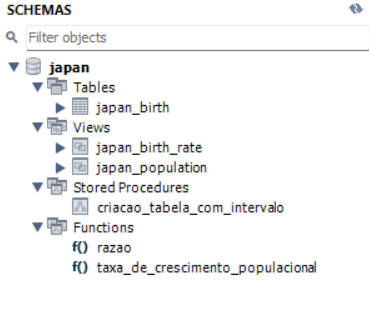

### Exercício 1 - Lista de Views com uma descrição detalhada, seu objetivo e quais tabelas compõem.

#### View 'japan_birth_rate' - Código correspondente:

In [ ]:
CREATE VIEW `japan_birth_rate` AS
SELECT 
        `year` AS `year`,
        `birth_total` AS `birth_total`,
        `birth_male` AS `birth_male`,
        `birth_female` AS `birth_female`
    FROM
        `japan_birth`

#### Código em execução:

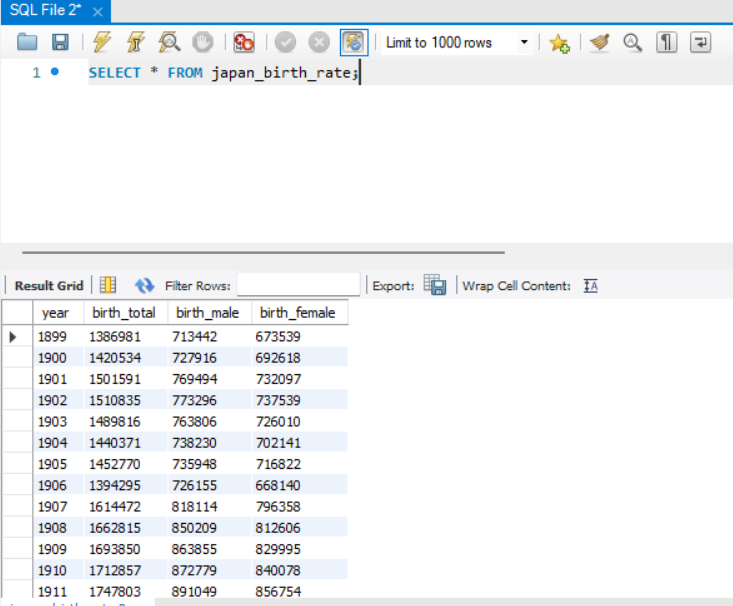

#### Descrição:

A view 'japan_birth_rate' representa a visualização referente ao valor de nascimento no decorrer dos anos, sua funcionalidade é trazer esse dado sem que haja poluição na visão do programador com os demais dados da tabela. O principal objetivo é obter uma visão clara e rápida do valor de nascimento de pessoas ao longo dos anos.

#### View 'japan_population' - Código correspondente:

In [ ]:
CREATE VIEW `japan_population` AS
    SELECT 
        `year` AS `year`,
        `population_total` AS `population_total`,
        `population_male` AS `population_male`,
        `population_female` AS `population_female`
    FROM
        `japan_birth`

#### Código em execução:

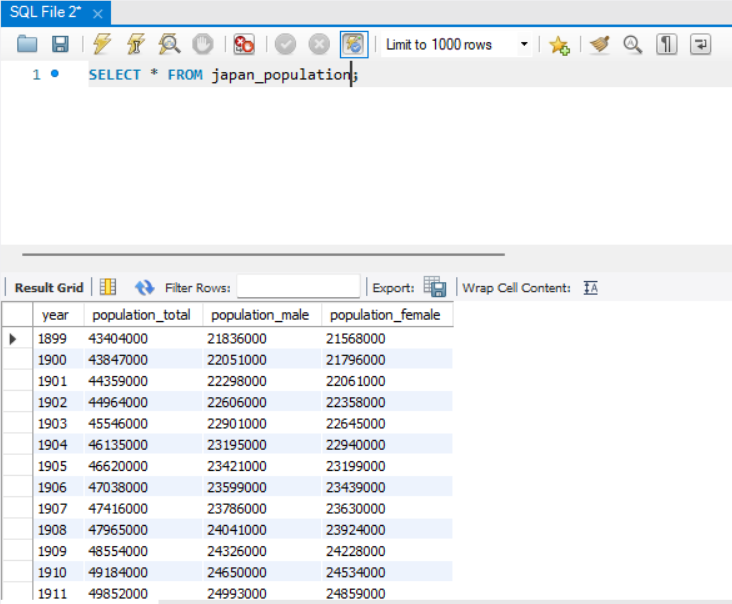

#### Descrição:

A view 'japan_population' visa trazer uma informação referente a população japonesa no decorrer dos anos, com o mesmo objetivo que a view anterior, ela trás a facilidade de visualização sem a necessidade de poluição com todos os demais dados da planilha. O principal objetivo é obter uma visão clara e rápida do valor de populacional do país e por gênero ao longo dos anos.

### Exercício 2 - Lista de Funções que incluam uma descrição detalhada, o objetivo para o qual foram criadas e quais dados ou tabelas manipulam e/ou são implementadas.

#### Função 'razao()' - Código correspondente:

In [ ]:
CREATE FUNCTION `razao`(year1 INTEGER, year2 INTEGER) 
RETURNS decimal(10,2)
DETERMINISTIC
BEGIN
	DECLARE POP1 INTEGER;
    DECLARE POP2 INTEGER;
    DECLARE razao DECIMAL(10, 2);
    
    SELECT population_total INTO POP1
    FROM japan_birth
    WHERE year = year1;
    
    SELECT population_total INTO POP2
    FROM japan_birth
    WHERE year = year2;
    
    IF POP1 > 0 AND POP2 > 0 THEN
		SET razao = (POP1 / POP2);
	ELSE
		SET razao = NULL;
	END IF;
    
RETURN razao;
END

#### Código em execução:

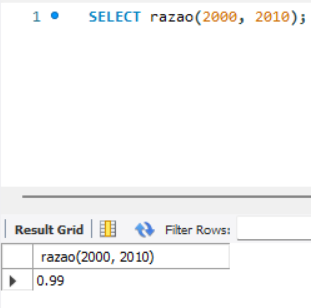

#### Descrição:

A Função 'razão()' recebe dois parâmetros, equivalentes a dois valores de anos, calculando o quanto a população de um ano é maior que a do outro ano, ou se há uma redução populacional entre os anos. Para que a função seja útil, é necessário colocar um ano inferior e após um ano superior, caso contrário o resultado será inadequado.

#### Função 'taxa_de_crescimento_populacional()' - Código correspondente:

In [ ]:
CREATE FUNCTION `taxa_de_crescimento_populacional`(year1 INTEGER, year2 INTEGER) 
RETURNS decimal(10,2)
    DETERMINISTIC
BEGIN
 DECLARE ano_inicio INTEGER;
 DECLARE ano_fim INTEGER;
 DECLARE crescimento DECIMAL(10,2);
 
 SELECT population_total INTO ano_inicio
 FROM japan_birth
 WHERE year = year1;
 
 SELECT population_total INTO ano_fim
 FROM japan_birth
 WHERE year = year2;
 
 IF ano_inicio > 0 THEN 
	SET crescimento = ((ano_fim - ano_inicio) / ano_inicio) * 100;
ELSE 
	SET crescimento = NULL;
END IF;

RETURN crescimento;
END

#### Código em execução:

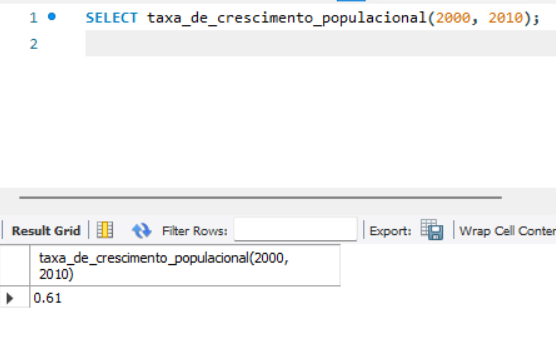

#### Descrição:

A Função 'taxa_de_crescimento_populacional()' recebe dois parâmetros, equialente a dois valores de anos, calculando quanto a população cresceu % entre as duas datas informadas. Similar a anterior, ela visa atribuir uma mensuração ao crescimento populacional mas em valor %. Diferente da função anterior, não há restrição quanto a ordem de valores inseridos referente aos anos.

### Exercício 3 - Lista de Stored Procedures com uma descrição detalhada, qual objetivo ou benefício trazem ao projeto, e as tabelas que os compõem e/ou com as quais interagem.

#### Stored Procedure 'criacao_tabela_com_intervalo' - Código correspondente:

In [ ]:
CREATE PROCEDURE `criacao_tabela_com_intervalo`(IN year1 INT, IN year2 INT)
BEGIN
    DECLARE nome_tabela VARCHAR(255);
    DECLARE sql_query TEXT;
    
    SET nome_tabela = CONCAT('population_', year1, '_', year2);
    
	SET @drop_stmt = CONCAT('DROP TABLE IF EXISTS ', nome_tabela);
    PREPARE drop_stmt FROM @drop_stmt;
    EXECUTE drop_stmt;
    DEALLOCATE PREPARE drop_stmt;
    
    SET sql_query = CONCAT('CREATE TABLE ', nome_tabela, ' AS ',
                           'SELECT * FROM japan_birth ',
                           'WHERE year BETWEEN ', year1, ' AND ', year2);
    
    SET @stmt = sql_query;
    
    PREPARE stmt FROM @stmt;
    
    EXECUTE stmt;
    
    DEALLOCATE PREPARE stmt;

END

#### Descrição:

A procedure 'criacao_tabela_com_intervalo()' tem por objetivo a criação de uma nova tabela à partir de um intervalo pré definido, recebendo dois valores referente a anos que devem ser conduzidos. Explicarei detalhadamente os componentes baixo:
* Declare - declara duas variáveis, uma é o correspondente ao nome da tabela nova, visando não entrar em conflito com novas tabelas e com intervalos distintos, e a segunda é um sql_query, referente ao texto sql que criaremos dentro da procedure;
* Set nome_table - personaliza o nome da tabela nova de acordo com os valores interidos, iniciando por 'population' seguidos pelos dois valores anuais separados por um '_';
* Set @drop_smt - identifica caso haja uma tabela com o mesmo nome criado na função e retira ela do banco de dados, visando atualizar os campos, caso seja necessário;
* Set sql_query - corresponde a criação da nossa query de criação, com os valores de nome da tabela, e os valores anuais dispostos na entrada da procedure;
* Set @stmt - isso indica a atribuição do valor sql_query ao @smt, (Por alguma razão não consigo fazer um prepare diretamente de sql_query.
* Comandos prepare, execute e deallocate são referentes a preparação, execução e disperção após o uso da nossa query.

### Método de inserção - Import

O arquivo foi importado via 'table data import wisard' então descrevendo o passo à passo à baixo:

1 - Clicando com o botão direito do mouse, sobre o nosso tables dentro de schema, temos a opção desejada:\
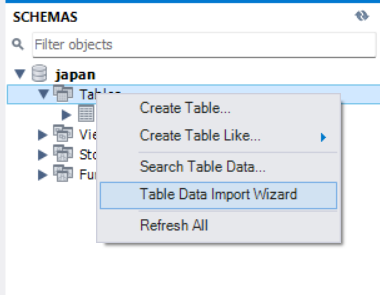

2 - Clicando na opção, temos a tela onde fazemos a busca do arquivo na maquina:  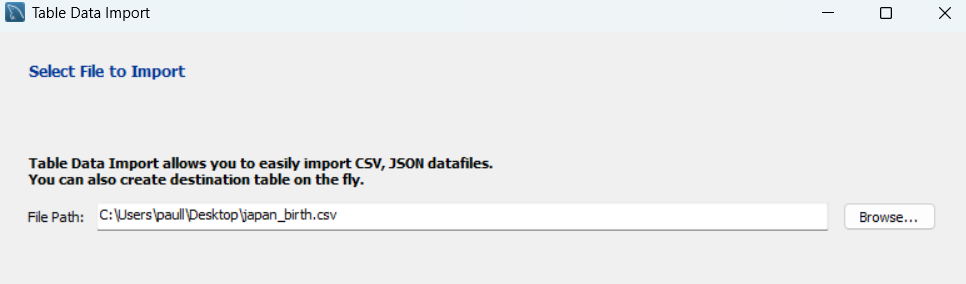

3 - Seguindo adiante, temos o campo onde selecionamos a criação de uma nova planilha ou inserir dentro de uma planilha existente, no meu caso criei uma planilha nova para o processo, denominada 'japan_birth'. 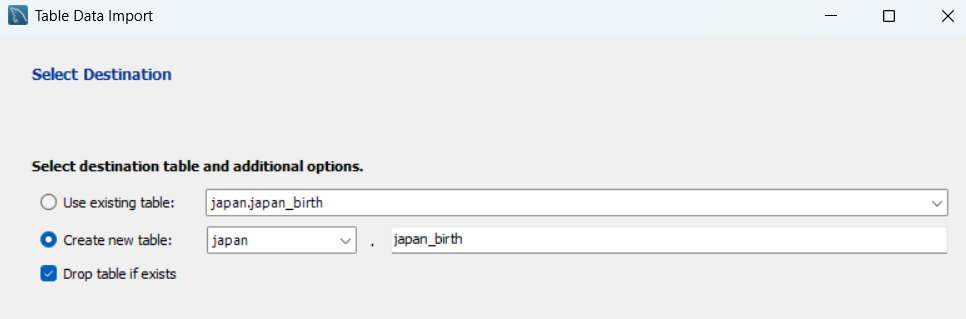

4 - No próximo espaço, temos o campo de classificação dos dados e delimitadores, onde selecionamos os tipos de cada dado, e caso haja algum conflito de delimitadores com o arquivo .csv, realizamos as devidas alterações dentro da chave ao lado de 'Detect file format: csv'  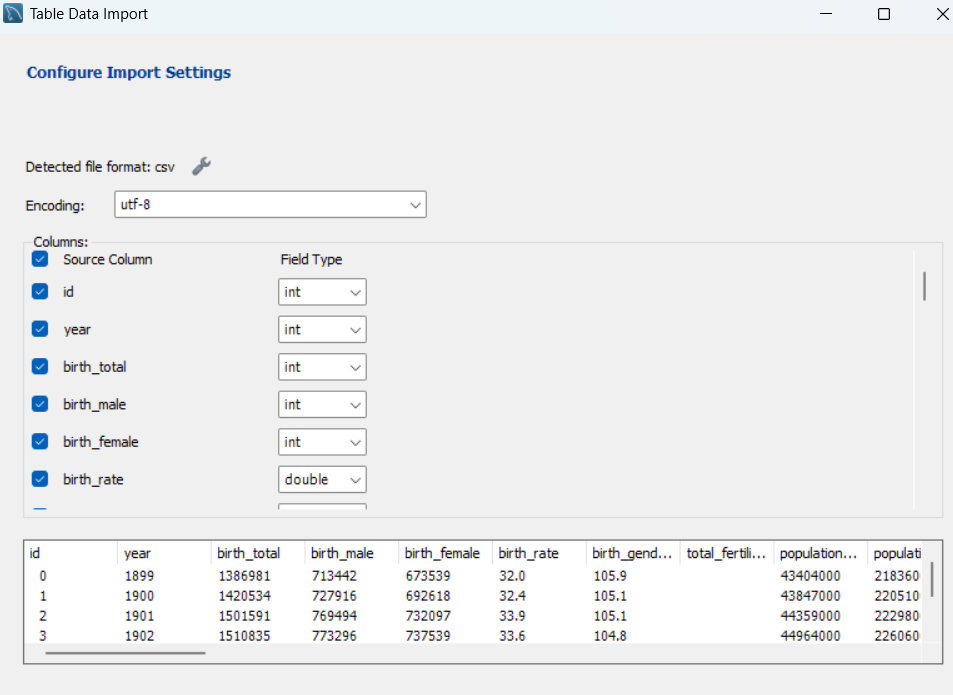

5 - Nesta tela, clicando no botão 'next' avançamos para o processo de importação, ao qual não realizarei pois tenho a planilha devidamente importada e tratada. 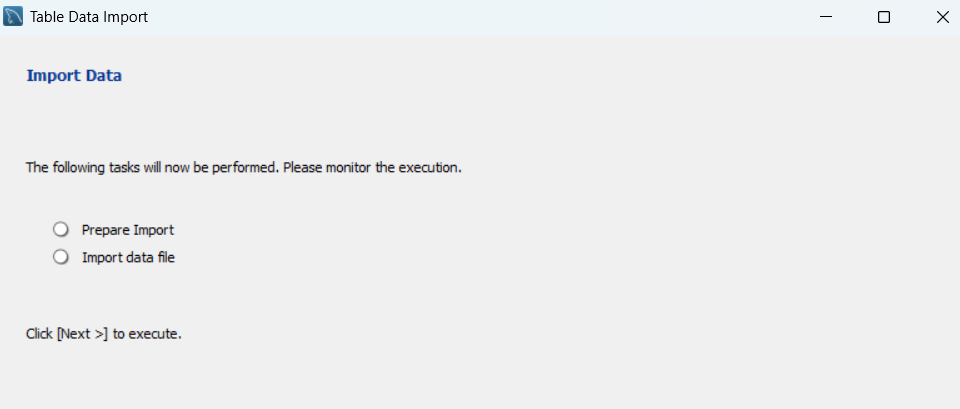